#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL3_Z3_1 = TDL_Class.TDL()
TDL3_Z3_1.initialize_TDL(6400,8000,1)

[6400 6401 6402 6403 6404 6405 6406 6407 6424 6425 6426 6427 6428 6429
 6430 6431 6448 6449 6450 6451 6452 6453 6454 6455 6472 6473 6474 6475
 6476 6477 6478 6479 6496 6497 6498 6499 6500 6501 6502 6503 6520 6521
 6522 6523 6524 6525 6526 6527 6544 6545 6546 6547 6548 6549 6550 6551
 6568 6569 6570 6571 6572 6573 6574 6575 6592 6593 6594 6595 6596 6597
 6598 6599 6616 6617 6618 6619 6620 6621 6622 6623 6640 6641 6642 6643
 6644 6645 6646 6647 6664 6665 6666 6667 6668 6669 6670 6671 6688 6689
 6690 6691 6692 6693 6694 6695 6712 6713 6714 6715 6716 6717 6718 6719
 6736 6737 6738 6739 6740 6741 6742 6743 6760 6761 6762 6763 6764 6765
 6766 6767 6784 6785 6786 6787 6788 6789 6790 6791 6808 6809 6810 6811
 6812 6813 6814 6815 6832 6833 6834 6835 6836 6837 6838 6839 6856 6857
 6858 6859 6860 6861 6862 6863 6880 6881 6882 6883 6884 6885 6886 6887
 6904 6905 6906 6907 6908 6909 6910 6911 6928 6929 6930 6931 6932 6933
 6934 6935 6952 6953 6954 6955 6956 6957 6958 6959 6976 6977 6978 6979
 6980 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch3_Z3_1_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch3_Z3_1_POR1.csv'.

There are 199 tapped bins and 194 untapped = 393 = 393

Tapped is: 50.64% 



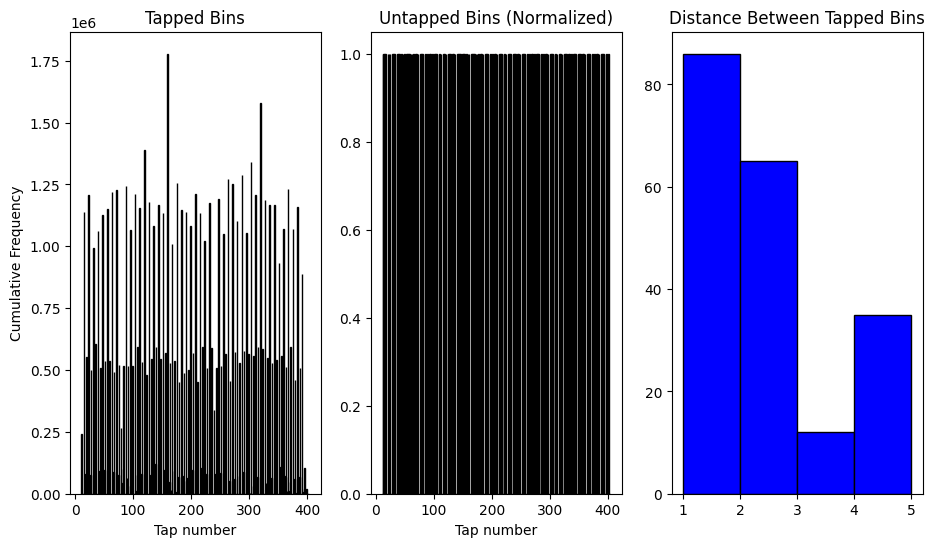

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch3_Z3_1_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL3_Z3_1.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL3_Z3_1.perform_POR()
to_print1 = TDL3_Z3_1.get_logical_assignments()
error_lib1 = TDL3_Z3_1.build_initial_error_lib()


Present taps: 
 [ 11  15  17  18  19  21  23  25  26  27  29  31  33  34  35  39  41  42
  43  45  47  50  51  55  58  59  61  63  65  66  67  71  73  74  75  77
  79  81  82  83  87  89  90  91  95  98  99 103 105 106 107 111 113 114
 115 119 121 122 123 127 129 130 131 135 137 138 139 143 146 147 151 153
 154 155 157 159 161 162 163 165 167 170 171 173 175 177 178 179 183 185
 186 187 191 193 194 195 199 202 203 207 209 210 211 215 218 219 223 225
 226 227 229 231 233 234 235 239 241 242 243 247 249 250 251 253 255 257
 258 259 263 265 266 267 271 274 275 279 282 283 287 289 290 291 295 297
 298 299 301 303 306 307 311 313 314 315 319 321 322 323 327 329 330 331
 335 338 339 341 343 345 346 347 351 354 355 359 361 362 363 365 367 369
 370 371 375 377 378 379 381 383 385 386 387 391 393 394 395 399 401 402
 403] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'ge

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL3_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL3_Z3_1.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(4), np.int64(8)),):[8, 4, 6, 7, np.int64(5)]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(6400), 1: np.int64(6401), 2: np.int64(6402), 3: np.int64(6403), 4: np.int64(6404), 5: np.int64(6405), 6: np.int64(6406), 7: np.int64(6407), 8: np.int64(6424), 9: np.int64(6425), 10: np.int64(6426), 11: np.int64(6427), 12: np.int64(6428), 13: np.int64(6429), 14: np.int64(6430), 15: np.int64(6431), 16: np.int64(6448), 17: np.int64(6449), 18: np.int64(6450), 19: np.int64(6451), 20: np.int64(6452), 21: np.int64(6453), 22: np.int64(6454), 23: np.int

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_1_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_1_POR2.csv'.

There are 364 tapped bins and 29 untapped = 393 = 393

Tapped is: 92.62% 



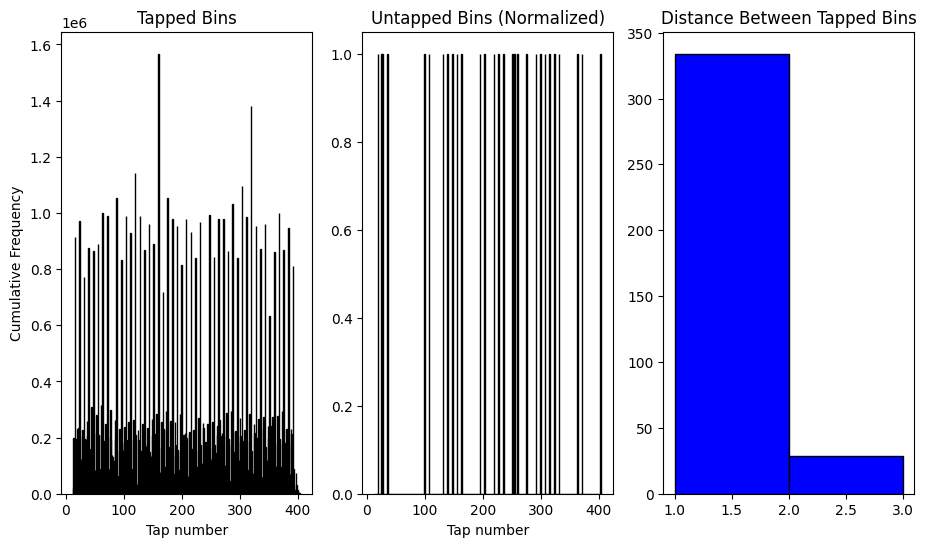

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_1_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL3_Z3_1.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL3_Z3_1.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL3_Z3_1.get_logical_assignments()

Present taps: 
 [ 12  13  14  15  16  17  18  20  21  22  23  24  26  28  29  30  31  32
  33  34  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98 100 101 102 103 104 105 106
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 132 133 134 135 136 137 138 140 141 142 143 144 145
 146 148 149 150 151 152 153 154 156 157 158 159 160 161 162 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 196 197 198 199 200 201 202 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 220 221 222 223
 224 225 226 228 229 230 231 232 233 234 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 252 253 255 256 257 258 260 261 262 263 264
 265 266 267 268 269 270 271 272 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL3_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL3_Z3_1.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 5, 7)
((np.int64(2), np.i

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_1_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_1_POR3.csv'.

There are 390 tapped bins and 3 untapped = 393 = 393

Tapped is: 99.24% 



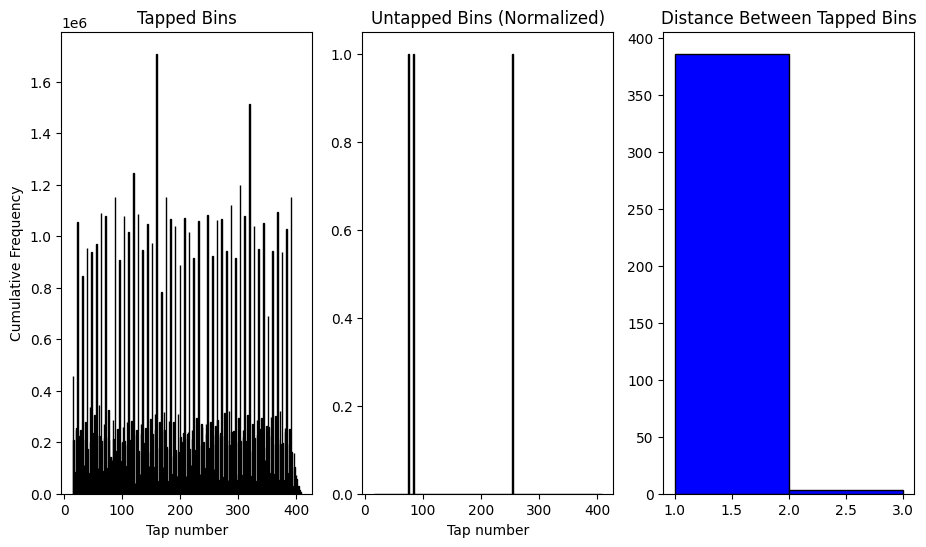

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250424/Unsync1_Ch3_Z3_1_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL1_Z3_1.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 25

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [11]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL3_Z3_1.npz", cdc_to_pass = cdc_to_pass)

In [14]:
print(cdc_to_pass)

{np.int64(6449): np.float64(20.371270901126767), np.int64(6448): np.float64(9.324411460730056), np.int64(6450): np.float64(1.3895813088567959), np.int64(6451): np.float64(3.7032029916018794), np.int64(6455): np.float64(3.6749478745455866), np.int64(6453): np.float64(11.10279031091035), np.int64(6452): np.float64(11.312831898743644), np.int64(6454): np.float64(0.17265035248592775), np.int64(6473): np.float64(47.07770449100602), np.int64(6472): np.float64(9.93889340705839), np.int64(6474): np.float64(0.0005793635989460663), np.int64(6475): np.float64(3.6462470931824122), np.int64(6479): np.float64(2.461181134753578), np.int64(6477): np.float64(11.056040125118471), np.int64(6476): np.float64(10.197601537203154), np.int64(6478): np.float64(0.0008913286137631789), np.int64(6497): np.float64(37.60305959242618), np.int64(6496): np.float64(9.406235427473515), np.int64(6498): np.float64(0.36762848674662313), np.int64(6499): np.float64(4.932256017119927), np.int64(6503): np.float64(4.49345494056

In [13]:
print(to_print2)

{0: np.int64(6400), 1: np.int64(6401), 2: np.int64(6402), 3: np.int64(6403), 4: np.int64(6404), 5: np.int64(6405), 6: np.int64(6406), 7: np.int64(6407), 8: np.int64(6424), 9: np.int64(6425), 10: np.int64(6426), 11: np.int64(6427), 12: np.int64(6431), 13: np.int64(6429), 14: np.int64(6430), 15: np.int64(6428), 16: np.int64(6449), 17: np.int64(6448), 18: np.int64(6450), 19: np.int64(6451), 20: np.int64(6455), 21: np.int64(6453), 22: np.int64(6452), 23: np.int64(6454), 24: np.int64(6473), 25: np.int64(6472), 26: np.int64(6474), 27: np.int64(6475), 28: np.int64(6479), 29: np.int64(6477), 30: np.int64(6476), 31: np.int64(6478), 32: np.int64(6497), 33: np.int64(6496), 34: np.int64(6498), 35: np.int64(6499), 36: np.int64(6503), 37: np.int64(6501), 38: np.int64(6502), 39: np.int64(6500), 40: np.int64(6521), 41: np.int64(6520), 42: np.int64(6522), 43: np.int64(6527), 44: np.int64(6523), 45: np.int64(6525), 46: np.int64(6524), 47: np.int64(6526), 48: np.int64(6545), 49: np.int64(6546), 50: np.in

In [12]:
print(bin3)
print(present_taps3)
print(freq3)

[ 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 1)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_24_POR2
The text file has been created in this directory under the name: Bin_sequence_25_04_24_POR2.txt.


In [ ]:
files.download("Bin_sequence_25_04_24_POR2.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL3_Z3_1.logical_assignment, TDL_start = TDL3_Z3_1.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 4, Ending Cell num: 151
4:[np.int64(4), np.int64(8)]
7:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
10:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
13:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
16:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
19:[np.int64(3), np.int64(4), np.int64(8)]
22:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
25:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
28:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
31:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
34:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
37:[np.int64(3), np.int64(4), np.int64(8)]
40:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
43:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
46:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
49:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
52:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
55:[np.

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL3_Z3_1.logical_assignment, TDL_start = TDL3_Z3_1.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 4. Ending Cell num 151
4:[np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
7:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL2_Z3_1.logical_assignment, TDL_start = TDL2_Z3_1.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 7, Ending Cell num: 151
7:[np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
10:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
13:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
16:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
19:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
22:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
25:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
28:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
31:[np.int64(1), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
34:[np.int64(1), np.int64

In [ ]:
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

(np.int64(2), np.int64(3), np.int64(4), np.int64(8)):[2, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>